In [103]:
from config import api_key
# Dependencies and Setup
%matplotlib inline
from scipy import stats
from pprint import pprint
import random
import json
import os
import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import gmaps
# Google developer API key
from config import gkey


In [104]:
# Load the Census_Data.csv file that was create Census Bureau.
filepath = os.path.join(".", "source_data", "Census_Data_utf.csv")

# Read file and store into Pandas DataFrames
census_data_df = pd.read_csv(filepath, encoding = 'utf-8')

# Visualize
census_data_df.head()

,FIPS,Geog_Level,State_Code,State_name,County_code,County_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),...,pct_Pov_Univ_ACS_14_18,pct_Prs_Blw_Pov_Lev_ACS_14_18,pct_One_Health_Ins_ACS_14_18,pct_No_Health_Ins_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18
0,1000,State,1,Alabama,0,All counties,32.7794,-86.8287,50645.319,48486.0,...,97.48,17.49,69.93,9.82,0.41,11.71,77.81,16.61,22.40,56.41
1,1001,County,1,Alabama,1,Autauga County,NaN,NaN,594.437,58786.0,...,99.21,15.38,72.36,7.02,0.00,8.18,84.00,13.01,19.03,61.97
2,1003,County,1,Alabama,3,Baldwin County,NaN,NaN,1589.786,55962.0,...,98.47,10.57,69.54,10.03,0.41,7.21,83.03,11.43,16.83,57.24
3,1005,County,1,Alabama,5,Barbour County,NaN,NaN,884.875,34186.0,...,88.65,28.86,58.07,9.92,0.29,18.02,64.92,23.95,34.11,38.84
4,1007,County,1,Alabama,7,Bibb County,NaN,NaN,622.581,45340.0,...,90.86,13.99,65.90,7.19,0.00,17.20,72.83,23.73,29.24,33.42


In [105]:
len(census_data_df)

3276

In [106]:
# Load the county_centroids.csv file that has the Geographic Coordinates for each county.
filepath = os.path.join(".", "source_data", "county_centroidutf.csv")

# Read file and store into Pandas DataFrames
county_data_df = pd.read_csv(filepath, encoding='utf-8')

# Visualize
county_data_df.head()

,Sort,FIPS,State,County,Latitude,Longitude
0,1,1001,AL,Autauga,32.536382,-86.6445
1,2,1003,AL,Baldwin,30.659218,-87.7461
2,3,1005,AL,Barbour,31.870670,-85.4055
3,4,1007,AL,Bibb,33.015893,-87.1271
4,5,1009,AL,Blount,33.977448,-86.5672


In [107]:
county_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sort       3143 non-null   int64  
 1   FIPS       3143 non-null   int64  
 2   State      3143 non-null   object 
 3   County     3143 non-null   object 
 4   Latitude   3143 non-null   float64
 5   Longitude  3143 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 147.5+ KB


In [108]:
# Merge the two data sets along zip code
census_data_complete = pd.merge(
    census_data_df, county_data_df, how="left", on=["FIPS", "FIPS"])
census_data_complete.head()

,FIPS,Geog_Level,State_Code,State_name,County_code,County_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),...,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,Sort,State,County,Latitude,Longitude
0,1000,State,1,Alabama,0,All counties,32.7794,-86.8287,50645.319,48486.0,...,11.71,77.81,16.61,22.40,56.41,NaN,NaN,NaN,NaN,NaN
1,1001,County,1,Alabama,1,Autauga County,NaN,NaN,594.437,58786.0,...,8.18,84.00,13.01,19.03,61.97,1.0,AL,Autauga,32.536382,-86.6445
2,1003,County,1,Alabama,3,Baldwin County,NaN,NaN,1589.786,55962.0,...,7.21,83.03,11.43,16.83,57.24,2.0,AL,Baldwin,30.659218,-87.7461
3,1005,County,1,Alabama,5,Barbour County,NaN,NaN,884.875,34186.0,...,18.02,64.92,23.95,34.11,38.84,3.0,AL,Barbour,31.870670,-85.4055
4,1007,County,1,Alabama,7,Bibb County,NaN,NaN,622.581,45340.0,...,17.20,72.83,23.73,29.24,33.42,4.0,AL,Bibb,33.015893,-87.1271


In [109]:
# Drop some columns.
census_data_complete.drop(["State_Code", "County_code", "Sort"], axis = 1, inplace = True)

In [110]:
census_data_complete.head()

,FIPS,Geog_Level,State_name,County_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),Tot_Pop_CEN_2010,...,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State,County,Latitude,Longitude
0,1000,State,Alabama,All counties,32.7794,-86.8287,50645.319,48486.0,1.250910e+11,4779736.0,...,0.41,11.71,77.81,16.61,22.40,56.41,NaN,NaN,NaN,NaN
1,1001,County,Alabama,Autauga County,NaN,NaN,594.437,58786.0,1.594492e+09,54571.0,...,0.00,8.18,84.00,13.01,19.03,61.97,AL,Autauga,32.536382,-86.6445
2,1003,County,Alabama,Baldwin County,NaN,NaN,1589.786,55962.0,6.070565e+09,182265.0,...,0.41,7.21,83.03,11.43,16.83,57.24,AL,Baldwin,30.659218,-87.7461
3,1005,County,Alabama,Barbour County,NaN,NaN,884.875,34186.0,4.400965e+08,27457.0,...,0.29,18.02,64.92,23.95,34.11,38.84,AL,Barbour,31.870670,-85.4055
4,1007,County,Alabama,Bibb County,NaN,NaN,622.581,45340.0,4.003389e+08,22915.0,...,0.00,17.20,72.83,23.73,29.24,33.42,AL,Bibb,33.015893,-87.1271


In [111]:
# Getting the number of duplicates in FIPS column. 
duplicate_count = census_data_complete.duplicated(subset = ["FIPS"], keep = False).sum()
print(f"There are a total of {duplicate_count} duplicates that show up in the FIPS column.")

There are a total of 6 duplicates that show up in the FIPS column.


In [112]:
# Getting the duplicates ID numbers. 
# Get all the data for the duplicate FIPS.
census_data_complete.loc[census_data_complete.duplicated(subset = ["FIPS"], keep = False), : ]

,FIPS,Geog_Level,State_name,County_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),Tot_Pop_CEN_2010,...,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State,County,Latitude,Longitude
78,2105,County,Alaska,Hoonah-Angoon Census Area,NaN,NaN,NaN,63603.0,6.166690e+07,NaN,...,1.69,10.93,73.94,15.89,26.66,25.41,AK,Hoonah-Angoon,58.076434,-135.1851
79,2105,County,Alaska,Hoonah-Angoon Census Area,NaN,NaN,7524.914,NaN,NaN,2150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,AK,Hoonah-Angoon,58.076434,-135.1851
90,2195,County,Alaska,Petersburg Census Area,NaN,NaN,NaN,66907.0,1.022473e+08,NaN,...,0.71,4.59,80.99,9.32,18.55,72.65,AK,Petersburg,56.639612,-133.5280
91,2195,County,Alaska,Petersburg Census Area,NaN,NaN,3281.982,NaN,NaN,3815.0,...,NaN,NaN,NaN,NaN,NaN,NaN,AK,Petersburg,56.639612,-133.5280
2878,51019,County,Virginia,Bedford County,NaN,NaN,NaN,61541.0,2.449329e+09,NaN,...,0.34,10.85,78.48,14.97,21.82,45.23,VA,Bedford,37.312408,-79.5279
2879,51019,County,Virginia,Bedford County,NaN,NaN,753.021,NaN,NaN,68676.0,...,NaN,NaN,NaN,NaN,NaN,NaN,VA,Bedford,37.312408,-79.5279


In [113]:
# Create a clean DataFrame by keeping the last duplicated FIPS.
#census_data_complete = census_data_complete.loc[~census_data_complete.duplicated(subset = ["FIPS"], keep = "Last"), : ].reset_index(drop = True)
#census_data_complete.head()
census_data_complete.drop_duplicates(subset=["FIPS"], keep='last', inplace=True)

In [114]:
# Getting the number of duplicates in FIPS column. 
duplicate_count2 = census_data_complete.duplicated(subset = ["FIPS"], keep = False).sum()
print(f"There are a total of {duplicate_count2} duplicates that show up in the FIPS column.")

There are a total of 0 duplicates that show up in the FIPS column.


In [115]:
census_data_complete.to_csv("./source_data/census_complete.csv", index = False)

# Include Ross' Data

   ###                                           Cases by County

In [116]:
# Load the cases by county.
filepath_county = os.path.join(".", "output_data", "cases_by_county_df.csv")

# Load the cases by state.
filepath_state = os.path.join(".", "output_data", "cases_by_state_df.csv")

# Read file and store into Pandas DataFrames
cases_by_county_df = pd.read_csv(filepath_county, encoding = 'utf-8')
cases_by_state_df = pd.read_csv(filepath_state, encoding = 'utf-8')

In [117]:
# Visualize cases by county.
cases_by_county_df.head()

,County&State,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,06-07-20,06-08-20,06-09-20,06-10-20,06-11-20,06-12-20,6/13/2020,6/14/2020,6/15/2020,population
0,"Statewide Unallocated,AL",0,Statewide Unallocated,AL,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Autauga County,AL",1001,Autauga County,AL,1,0,0,0,0,0,...,265,272,282,295,312,323,331,357,368,55869
2,"Baldwin County,AL",1003,Baldwin County,AL,1,0,0,0,0,0,...,313,320,325,331,343,353,361,364,383,223234
3,"Barbour County,AL",1005,Barbour County,AL,1,0,0,0,0,0,...,193,197,199,208,214,221,226,234,238,24686
4,"Bibb County,AL",1007,Bibb County,AL,1,0,0,0,0,0,...,77,79,85,89,93,97,100,104,111,22394


In [118]:
# Visualize cases by state.
cases_by_state_df.head()

,State,countyFIPS,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,...,06-07-20,06-08-20,06-09-20,06-10-20,06-11-20,06-12-20,6/13/2020,6/14/2020,6/15/2020,population
0,AK,64610,62,0,0,0,0,0,0,0,...,544,563,573,593,610,625,652,661,664,731545
1,AL,71489,68,0,0,0,0,0,0,0,...,20166,20590,21071,21626,22474,23333,24220,25235,26272,4903185
2,AR,380625,380,0,0,0,0,0,0,0,...,9424,9736,10076,10366,10814,11546,12094,12499,12917,3017804
3,AZ,60208,64,0,0,0,0,1,1,1,...,26889,27677,28296,29852,31263,32918,34458,35691,36705,7278717
4,CA,357364,360,0,0,0,0,2,3,3,...,131348,133884,136863,139736,143238,146999,150314,152969,155687,39512223


In [119]:
# Filter by County.
cases_county_filter = cases_by_county_df.filter(['countyFIPS','6/15/2020'])
cases_county_filter=cases_county_filter[cases_county_filter['countyFIPS'] != 0]
cases_county_filter.head()

,countyFIPS,6/15/2020
1,1001,368
2,1003,383
3,1005,238
4,1007,111
5,1009,116


In [120]:
cases_county_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145 entries, 1 to 3194
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   countyFIPS  3145 non-null   int64
 1   6/15/2020   3145 non-null   int64
dtypes: int64(2)
memory usage: 73.7 KB


In [121]:
# Filter by state.
cases_state_filter = cases_by_state_df.filter(['State', 'stateFIPS','6/15/2020'])
cases_state_filter.head()

,State,stateFIPS,6/15/2020
0,AK,62,664
1,AL,68,26272
2,AR,380,12917
3,AZ,64,36705
4,CA,360,155687


## Census By County

In [122]:
census_county_only = census_data_complete[census_data_complete['Geog_Level'] == 'County']
census_county_only.head()

,FIPS,Geog_Level,State_name,County_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),Tot_Pop_CEN_2010,...,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State,County,Latitude,Longitude
1,1001,County,Alabama,Autauga County,NaN,NaN,594.437,58786.0,1.594492e+09,54571.0,...,0.00,8.18,84.00,13.01,19.03,61.97,AL,Autauga,32.536382,-86.6445
2,1003,County,Alabama,Baldwin County,NaN,NaN,1589.786,55962.0,6.070565e+09,182265.0,...,0.41,7.21,83.03,11.43,16.83,57.24,AL,Baldwin,30.659218,-87.7461
3,1005,County,Alabama,Barbour County,NaN,NaN,884.875,34186.0,4.400965e+08,27457.0,...,0.29,18.02,64.92,23.95,34.11,38.84,AL,Barbour,31.870670,-85.4055
4,1007,County,Alabama,Bibb County,NaN,NaN,622.581,45340.0,4.003389e+08,22915.0,...,0.00,17.20,72.83,23.73,29.24,33.42,AL,Bibb,33.015893,-87.1271
5,1009,County,Alabama,Blount County,NaN,NaN,644.775,48695.0,1.249317e+09,57322.0,...,0.63,14.39,74.34,21.35,27.35,49.47,AL,Blount,33.977448,-86.5672


## Census By State

In [123]:
census_state_only = census_data_complete[census_data_complete['Geog_Level'] == 'State'].reset_index()
census_state_only.head()

,index,FIPS,Geog_Level,State_name,County_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),...,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State,County,Latitude,Longitude
0,0,1000,State,Alabama,All counties,32.7794,-86.8287,50645.319,48486.0,1.250910e+11,...,0.41,11.71,77.81,16.61,22.40,56.41,NaN,NaN,NaN,NaN
1,68,2000,State,Alaska,All counties,64.0685,-152.2782,570640.952,76715.0,2.445883e+10,...,1.24,4.16,87.52,6.65,12.24,68.43,NaN,NaN,NaN,NaN
2,100,4000,State,Arizona,All counties,34.2744,-111.6602,113594.092,56213.0,1.949298e+11,...,0.92,7.63,84.23,10.11,14.70,67.88,NaN,NaN,NaN,NaN
3,116,5000,State,Arkansas,All counties,34.8938,-92.4426,52035.483,45726.0,7.405202e+10,...,0.47,10.97,74.20,15.86,23.38,50.29,NaN,NaN,NaN,NaN
4,192,6000,State,California,All counties,37.1841,-119.4696,155779.247,71228.0,1.315898e+12,...,1.17,5.65,87.29,8.32,12.24,73.00,NaN,NaN,NaN,NaN


In [124]:
# Drop some columns.
census_state_only.drop(["Geog_Level", "County_name", "State", "County", "Latitude", "Longitude", "index"], axis = 1, inplace = True)
census_state_only.head()

,FIPS,State_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),Tot_Pop_CEN_2010,Tot_Pop_ACS_14_18,Pop_65plus_ACS_14_18,...,pct_Pov_Univ_ACS_14_18,pct_Prs_Blw_Pov_Lev_ACS_14_18,pct_One_Health_Ins_ACS_14_18,pct_No_Health_Ins_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18
0,1000,Alabama,32.7794,-86.8287,50645.319,48486.0,1.250910e+11,4779736.0,4864680.0,783832.0,...,97.48,17.49,69.93,9.82,0.41,11.71,77.81,16.61,22.40,56.41
1,2000,Alaska,64.0685,-152.2782,570640.952,76715.0,2.445883e+10,710231.0,738516.0,78428.0,...,97.58,10.80,66.40,13.94,1.24,4.16,87.52,6.65,12.24,68.43
2,4000,Arizona,34.2744,-111.6602,113594.092,56213.0,1.949298e+11,6392017.0,6946685.0,1158320.0,...,97.73,16.09,71.51,10.77,0.92,7.63,84.23,10.11,14.70,67.88
3,5000,Arkansas,34.8938,-92.4426,52035.483,45726.0,7.405202e+10,2915918.0,2990671.0,487536.0,...,97.07,17.58,71.31,8.88,0.47,10.97,74.20,15.86,23.38,50.29
4,6000,California,37.1841,-119.4696,155779.247,71228.0,1.315898e+12,37253956.0,39148760.0,5315457.0,...,98.11,14.29,76.70,8.38,1.17,5.65,87.29,8.32,12.24,73.00


In [125]:
state_abbr_list = ['AL', 'AK', 'AZ', 'AR',  'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
         'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM',
         'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [126]:
for counter, state in enumerate(state_abbr_list):
    census_state_only.loc[counter, 'State_abbr'] = state

In [127]:
census_state_only.head()

,FIPS,State_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),Tot_Pop_CEN_2010,Tot_Pop_ACS_14_18,Pop_65plus_ACS_14_18,...,pct_Prs_Blw_Pov_Lev_ACS_14_18,pct_One_Health_Ins_ACS_14_18,pct_No_Health_Ins_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State_abbr
0,1000,Alabama,32.7794,-86.8287,50645.319,48486.0,1.250910e+11,4779736.0,4864680.0,783832.0,...,17.49,69.93,9.82,0.41,11.71,77.81,16.61,22.40,56.41,AL
1,2000,Alaska,64.0685,-152.2782,570640.952,76715.0,2.445883e+10,710231.0,738516.0,78428.0,...,10.80,66.40,13.94,1.24,4.16,87.52,6.65,12.24,68.43,AK
2,4000,Arizona,34.2744,-111.6602,113594.092,56213.0,1.949298e+11,6392017.0,6946685.0,1158320.0,...,16.09,71.51,10.77,0.92,7.63,84.23,10.11,14.70,67.88,AZ
3,5000,Arkansas,34.8938,-92.4426,52035.483,45726.0,7.405202e+10,2915918.0,2990671.0,487536.0,...,17.58,71.31,8.88,0.47,10.97,74.20,15.86,23.38,50.29,AR
4,6000,California,37.1841,-119.4696,155779.247,71228.0,1.315898e+12,37253956.0,39148760.0,5315457.0,...,14.29,76.70,8.38,1.17,5.65,87.29,8.32,12.24,73.00,CA


In [128]:
census_county_only.head()

,FIPS,Geog_Level,State_name,County_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),Tot_Pop_CEN_2010,...,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State,County,Latitude,Longitude
1,1001,County,Alabama,Autauga County,NaN,NaN,594.437,58786.0,1.594492e+09,54571.0,...,0.00,8.18,84.00,13.01,19.03,61.97,AL,Autauga,32.536382,-86.6445
2,1003,County,Alabama,Baldwin County,NaN,NaN,1589.786,55962.0,6.070565e+09,182265.0,...,0.41,7.21,83.03,11.43,16.83,57.24,AL,Baldwin,30.659218,-87.7461
3,1005,County,Alabama,Barbour County,NaN,NaN,884.875,34186.0,4.400965e+08,27457.0,...,0.29,18.02,64.92,23.95,34.11,38.84,AL,Barbour,31.870670,-85.4055
4,1007,County,Alabama,Bibb County,NaN,NaN,622.581,45340.0,4.003389e+08,22915.0,...,0.00,17.20,72.83,23.73,29.24,33.42,AL,Bibb,33.015893,-87.1271
5,1009,County,Alabama,Blount County,NaN,NaN,644.775,48695.0,1.249317e+09,57322.0,...,0.63,14.39,74.34,21.35,27.35,49.47,AL,Blount,33.977448,-86.5672


In [129]:
census_county_only_filter = census_county_only.filter(['FIPS','State_name', 'State', 'County_name', 'Latitude', 'Longitude',
                                                       'LAND_AREA', 'Med_HHD_Inc_ACS_14_18($)', 'Prs_Blw_Pov_Lev_ACS_14_18',
                                                       'pct_NoHealthIns_65P_ACS_14_18' ])
census_county_only_filter.head()

,FIPS,State_name,State,County_name,Latitude,Longitude,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Prs_Blw_Pov_Lev_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18
1,1001,Alabama,AL,Autauga County,32.536382,-86.6445,594.437,58786.0,8422.0,0.00
2,1003,Alabama,AL,Baldwin County,30.659218,-87.7461,1589.786,55962.0,21653.0,0.41
3,1005,Alabama,AL,Barbour County,31.870670,-85.4055,884.875,34186.0,6597.0,0.29
4,1007,Alabama,AL,Bibb County,33.015893,-87.1271,622.581,45340.0,2863.0,0.00
5,1009,Alabama,AL,Blount County,33.977448,-86.5672,644.775,48695.0,8220.0,0.63


In [130]:
# Merge for covid_county_full
covid_county = pd.merge(cases_county_filter, census_county_only_filter, how="left", left_on = "countyFIPS", 
                             right_on = "FIPS")
# Drop some columns.
covid_county.drop(["FIPS"], axis = 1, inplace = True)
# Remove rows missing data
covid_county = covid_county.dropna()
covid_county_full = covid_county.copy()

# covid_county_full

In [131]:
covid_county_full.head()

,countyFIPS,6/15/2020,State_name,State,County_name,Latitude,Longitude,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Prs_Blw_Pov_Lev_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18
0,1001,368,Alabama,AL,Autauga County,32.536382,-86.6445,594.437,58786.0,8422.0,0.00
1,1003,383,Alabama,AL,Baldwin County,30.659218,-87.7461,1589.786,55962.0,21653.0,0.41
2,1005,238,Alabama,AL,Barbour County,31.870670,-85.4055,884.875,34186.0,6597.0,0.29
3,1007,111,Alabama,AL,Bibb County,33.015893,-87.1271,622.581,45340.0,2863.0,0.00
4,1009,116,Alabama,AL,Blount County,33.977448,-86.5672,644.775,48695.0,8220.0,0.63


In [132]:
# Merge for covid_state_full
covid_state_full = pd.merge(cases_state_filter, census_state_only, how = "inner", left_on = "State", 
                             right_on = "State_abbr")
covid_state_full.head()

,State,stateFIPS,6/15/2020,FIPS,State_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),...,pct_Prs_Blw_Pov_Lev_ACS_14_18,pct_One_Health_Ins_ACS_14_18,pct_No_Health_Ins_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State_abbr
0,AK,62,664,2000,Alaska,64.0685,-152.2782,570640.952,76715.0,2.445883e+10,...,10.80,66.40,13.94,1.24,4.16,87.52,6.65,12.24,68.43,AK
1,AL,68,26272,1000,Alabama,32.7794,-86.8287,50645.319,48486.0,1.250910e+11,...,17.49,69.93,9.82,0.41,11.71,77.81,16.61,22.40,56.41,AL
2,AR,380,12917,5000,Arkansas,34.8938,-92.4426,52035.483,45726.0,7.405202e+10,...,17.58,71.31,8.88,0.47,10.97,74.20,15.86,23.38,50.29,AR
3,AZ,64,36705,4000,Arizona,34.2744,-111.6602,113594.092,56213.0,1.949298e+11,...,16.09,71.51,10.77,0.92,7.63,84.23,10.11,14.70,67.88,AZ
4,CA,360,155687,6000,California,37.1841,-119.4696,155779.247,71228.0,1.315898e+12,...,14.29,76.70,8.38,1.17,5.65,87.29,8.32,12.24,73.00,CA


In [133]:
covid_state_full_filter = covid_state_full.filter(['State_name','6/15/2020', 'Lat_State', 'Lon_State',
                                                       'LAND_AREA', 'Med_HHD_Inc_ACS_14_18($)', 'Prs_Blw_Pov_Lev_ACS_14_18',
                                                       'pct_NoHealthIns_65P_ACS_14_18' ])
covid_state_full_filter.head()

,State_name,6/15/2020,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Prs_Blw_Pov_Lev_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18
0,Alaska,664,64.0685,-152.2782,570640.952,76715.0,77865.0,1.24
1,Alabama,26272,32.7794,-86.8287,50645.319,48486.0,829400.0,0.41
2,Arkansas,12917,34.8938,-92.4426,52035.483,45726.0,510337.0,0.47
3,Arizona,36705,34.2744,-111.6602,113594.092,56213.0,1092192.0,0.92
4,California,155687,37.1841,-119.4696,155779.247,71228.0,5487141.0,1.17


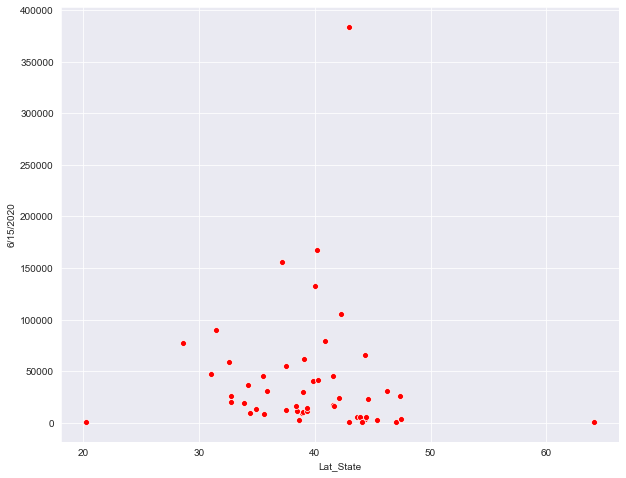

In [134]:
# Scatter plot.
plt.rcParams["figure.figsize"] = [10,8]
sns.set_style('darkgrid')
sns.scatterplot(x='Lat_State', y='6/15/2020', data = covid_state_full, color = 'r')

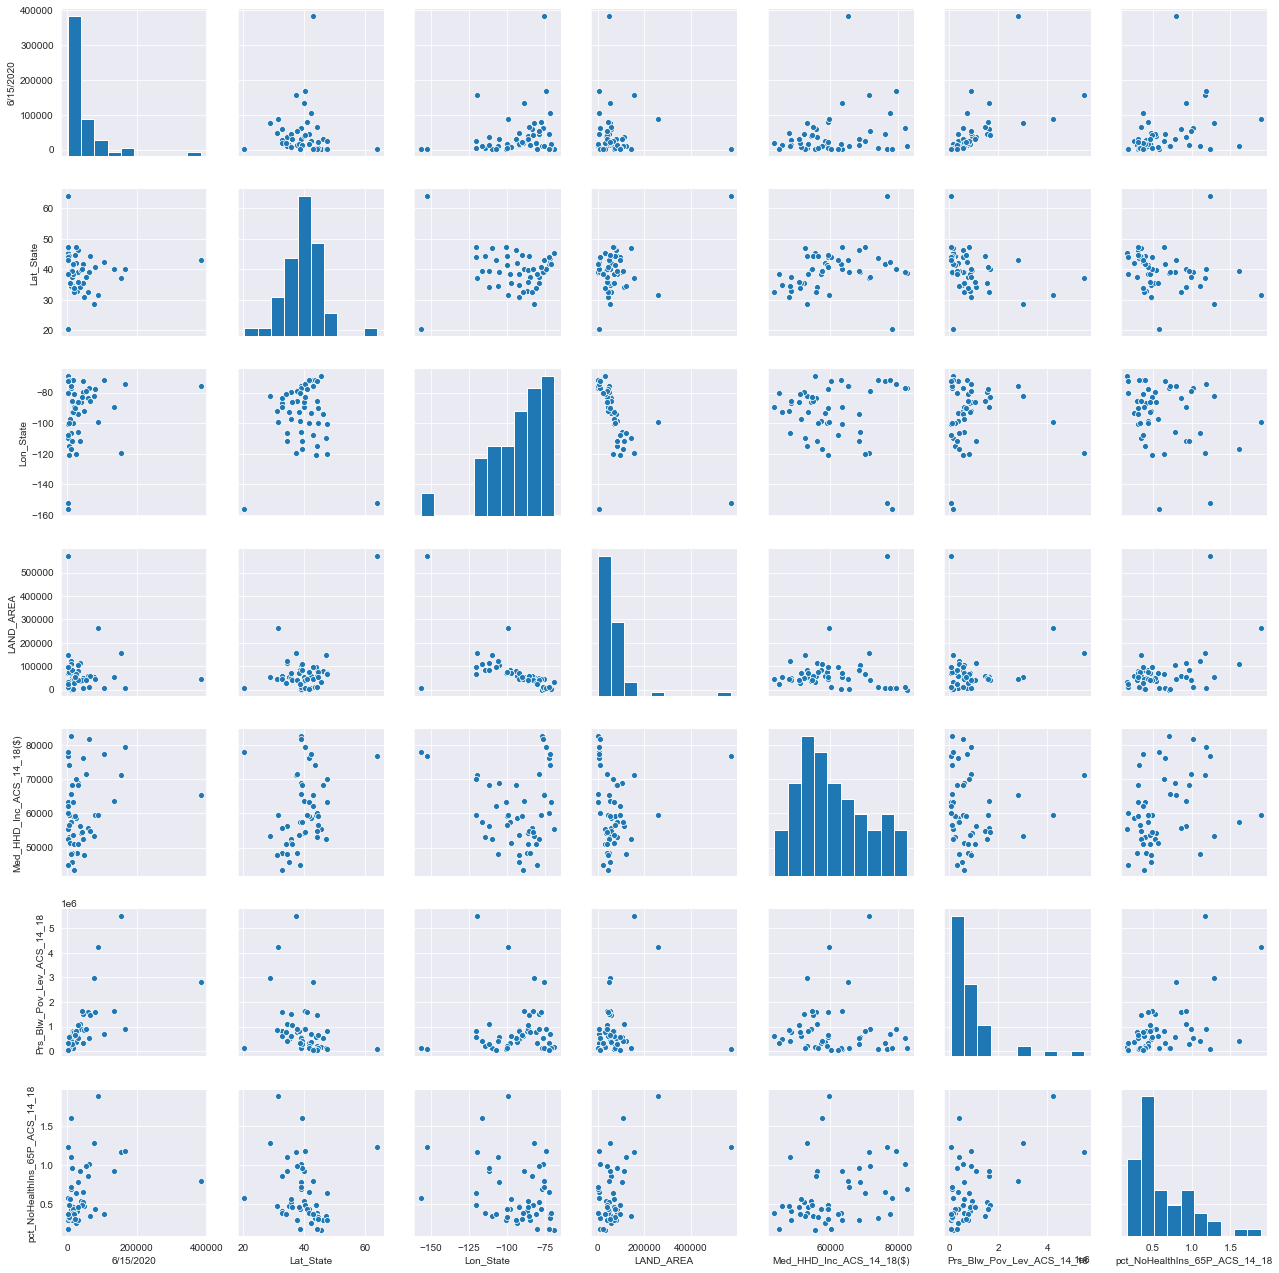

In [135]:
sns.pairplot(covid_state_full_filter)

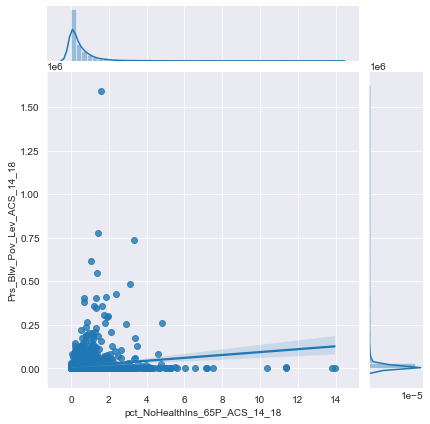

In [136]:
sns.jointplot(x='pct_NoHealthIns_65P_ACS_14_18', y='Prs_Blw_Pov_Lev_ACS_14_18', data=covid_county_full, kind = 'reg')

# Region

In [137]:
Northeast = ['CT','ME','MA','NH','RI','VT','NY','PA']
Midwest = ['IL','IN','MI','OH','WI','IA','KS','MN','NE','ND','SD']
South = ['DE','FL','GA','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
West = ['AZ','CO','ID','MT','NV','NM','UT','WY','AK','CA','HIOR','WA']

### Region: County Level

In [138]:
covid_county_full_region = covid_county_full.copy()
covid_county_full_region = covid_county_full_region.dropna()
covid_county_full_region.head()

,countyFIPS,6/15/2020,State_name,State,County_name,Latitude,Longitude,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Prs_Blw_Pov_Lev_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18
0,1001,368,Alabama,AL,Autauga County,32.536382,-86.6445,594.437,58786.0,8422.0,0.00
1,1003,383,Alabama,AL,Baldwin County,30.659218,-87.7461,1589.786,55962.0,21653.0,0.41
2,1005,238,Alabama,AL,Barbour County,31.870670,-85.4055,884.875,34186.0,6597.0,0.29
3,1007,111,Alabama,AL,Bibb County,33.015893,-87.1271,622.581,45340.0,2863.0,0.00
4,1009,116,Alabama,AL,Blount County,33.977448,-86.5672,644.775,48695.0,8220.0,0.63


In [139]:
for index, row in covid_county_full.iterrows():
    
    if row['State'] in Northeast:
        covid_county_full_region.loc[index, 'Region'] = "Northeast"
        
              
    elif row['State'] in Midwest:
        covid_county_full_region.loc[index, 'Region'] = "Midwest"
        
    elif row['State'] in South:
        covid_county_full_region.loc[index, 'Region'] = "South"
        
    elif row['State'] in West:
        covid_county_full_region.loc[index, 'Region'] = "West"
    
covid_county_full_region.head()

,countyFIPS,6/15/2020,State_name,State,County_name,Latitude,Longitude,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Prs_Blw_Pov_Lev_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18,Region
0,1001,368,Alabama,AL,Autauga County,32.536382,-86.6445,594.437,58786.0,8422.0,0.00,South
1,1003,383,Alabama,AL,Baldwin County,30.659218,-87.7461,1589.786,55962.0,21653.0,0.41,South
2,1005,238,Alabama,AL,Barbour County,31.870670,-85.4055,884.875,34186.0,6597.0,0.29,South
3,1007,111,Alabama,AL,Bibb County,33.015893,-87.1271,622.581,45340.0,2863.0,0.00,South
4,1009,116,Alabama,AL,Blount County,33.977448,-86.5672,644.775,48695.0,8220.0,0.63,South


### Region: State Level

In [140]:
covid_state_full_region = covid_state_full.copy()

In [141]:
for index, row in covid_state_full.iterrows():
    
    if row['State_abbr'] in Northeast:
        covid_state_full_region.loc[index, 'Region'] = "Northeast"
        
    elif row['State_abbr'] in Midwest:
        covid_state_full_region.loc[index, 'Region'] = "Midwest"
        
    elif row['State_abbr'] in South:
        covid_state_full_region.loc[index, 'Region'] = "South"
        
    elif row['State_abbr'] in West:
        covid_state_full_region.loc[index, 'Region'] = "West"

# Remove rows missing data
covid_state_full_region = covid_state_full_region.dropna()
covid_state_full_region.head()   

,State,stateFIPS,6/15/2020,FIPS,State_name,Lat_State,Lon_State,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Aggregate_HH_INC_ACS_14_18($),...,pct_One_Health_Ins_ACS_14_18,pct_No_Health_Ins_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18,pct_Pop_NoCompDevic_ACS_14_18,pct_Pop_w_BroadComp_ACS_14_18,pct_HHD_NoCompDevic_ACS_14_18,pct_HHD_No_Internet_ACS_14_18,pct_HHD_w_Broadband_ACS_14_18,State_abbr,Region
0,AK,62,664,2000,Alaska,64.0685,-152.2782,570640.952,76715.0,2.445883e+10,...,66.40,13.94,1.24,4.16,87.52,6.65,12.24,68.43,AK,West
1,AL,68,26272,1000,Alabama,32.7794,-86.8287,50645.319,48486.0,1.250910e+11,...,69.93,9.82,0.41,11.71,77.81,16.61,22.40,56.41,AL,South
2,AR,380,12917,5000,Arkansas,34.8938,-92.4426,52035.483,45726.0,7.405202e+10,...,71.31,8.88,0.47,10.97,74.20,15.86,23.38,50.29,AR,South
3,AZ,64,36705,4000,Arizona,34.2744,-111.6602,113594.092,56213.0,1.949298e+11,...,71.51,10.77,0.92,7.63,84.23,10.11,14.70,67.88,AZ,West
4,CA,360,155687,6000,California,37.1841,-119.4696,155779.247,71228.0,1.315898e+12,...,76.70,8.38,1.17,5.65,87.29,8.32,12.24,73.00,CA,West


In [142]:
total_cases = covid_state_full_region['6/15/2020'].sum()
total_cases

1911712

## Cases by Region: State Level

In [143]:
# Groupby Region for States.
region_case_count_df = covid_state_full_region.groupby(['Region']).agg({'6/15/2020' : 'sum'}).reset_index()
region_case_count_df.rename(columns = {'6/15/2020' : 'Cases as of Jun 15'}, inplace = True)
# Add a column whose default values are the expected values
region_case_count_df['expected'] = total_cases / 4
region_case_count_df

,Region,Cases as of Jun 15,expected
0,Midwest,395934,477928.0
1,Northeast,639435,477928.0
2,South,587053,477928.0
3,West,289290,477928.0


## Let's use the Chi Square Test to test if the regional distribution of cases is uniform.

In [144]:
# GOODNESS of FIT
# The degree of freedom is 4-1 = 3
# With a significance of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [145]:
# Run the Chi square test with stats.chisquare()
stats.chisquare(region_case_count_df['Cases as of Jun 15'], region_case_count_df['expected'])

Power_divergenceResult(statistic=168017.1234035252, pvalue=0.0)

#### The Chi Square analysis is significant, p < 0.001. This means that the proportion of cases in the US differs regionally.

In [147]:
# Extract individual groups.
South = covid_county_full_region[covid_county_full_region["Region"] == 'South']["6/15/2020"]
West = covid_county_full_region[covid_county_full_region["Region"] == 'West']["6/15/2020"]
Northeast = covid_county_full_region[covid_county_full_region["Region"] == 'Northeast']["6/15/2020"]
Midwest = covid_county_full_region[covid_county_full_region["Region"] == 'Midwest']["6/15/2020"]

In [166]:
# Cases summary regionally per county.
region_cases_Summary = covid_county_full_region.groupby("Region").agg({"6/15/2020" : ['mean', 'std', 'var', 'sem'],
                                                                       'County_name' : 'count'}).reset_index()
region_cases_Summary.columns = ['Region', 'AverageCases', 'CasesStd', 'CasesVar', 'CasesSEM', 'Counties']
region_cases_Summary["AverageCases"] = region_cases_Summary["AverageCases"].map("{:.0f}".format)
region_cases_Summary["CasesStd"] = region_cases_Summary["CasesStd"].map("{:.0f}".format)
region_cases_Summary["CasesVar"] = region_cases_Summary["CasesVar"].map("{:.0f}".format)
region_cases_Summary["CasesSEM"] = region_cases_Summary["CasesSEM"].map("{:.0f}".format)

region_cases_Summary

,Region,AverageCases,CasesStd,CasesVar,CasesSEM,Counties
0,Midwest,416,3042,9254883,99,940
1,Northeast,3251,9162,83935665,654,196
2,South,409,1386,1919875,37,1421
3,West,716,4025,16199497,200,403


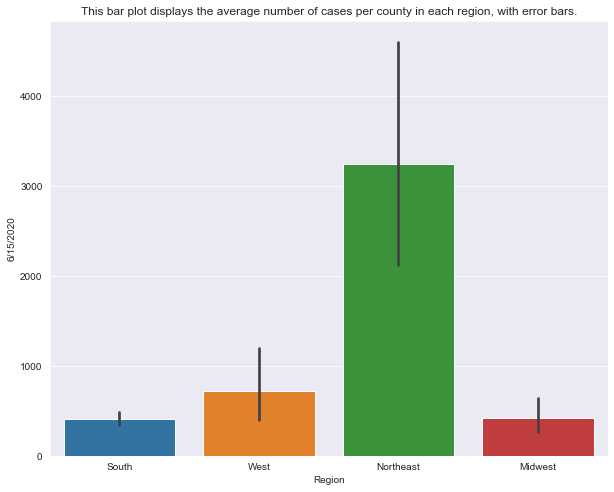

In [168]:
plt.title('This bar plot displays the average number of cases per county in each region, with error bars.')
sns.barplot(x='Region', y='6/15/2020', data=covid_county_full_region);

In [148]:
# Perform the ANOVA
stats.f_oneway(South, West, Northeast, Midwest)

F_onewayResult(statistic=41.96981968656302, pvalue=1.4852488502536579e-26)

#### This means that the ANOVA is significant(p < 0.001), that is, atleast one of the average cases per county is different regionally.

In [170]:
covid_county_full_region.head()

,countyFIPS,6/15/2020,State_name,State,County_name,Latitude,Longitude,LAND_AREA,Med_HHD_Inc_ACS_14_18($),Prs_Blw_Pov_Lev_ACS_14_18,pct_NoHealthIns_65P_ACS_14_18,Region
0,1001,368,Alabama,AL,Autauga County,32.536382,-86.6445,594.437,58786.0,8422.0,0.00,South
1,1003,383,Alabama,AL,Baldwin County,30.659218,-87.7461,1589.786,55962.0,21653.0,0.41,South
2,1005,238,Alabama,AL,Barbour County,31.870670,-85.4055,884.875,34186.0,6597.0,0.29,South
3,1007,111,Alabama,AL,Bibb County,33.015893,-87.1271,622.581,45340.0,2863.0,0.00,South
4,1009,116,Alabama,AL,Blount County,33.977448,-86.5672,644.775,48695.0,8220.0,0.63,South


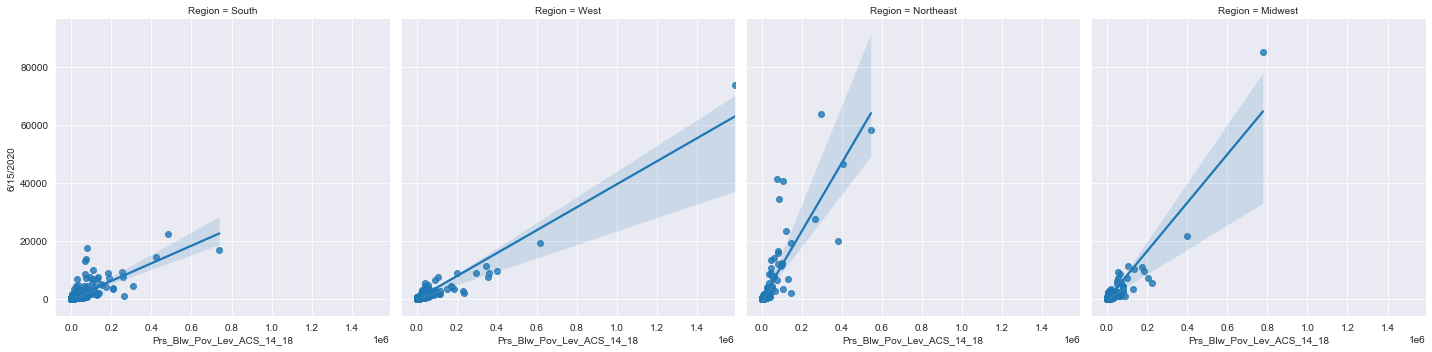

In [175]:
plt.rcParams['figure.figsize'] = [12,6]
sns.lmplot(x='Prs_Blw_Pov_Lev_ACS_14_18', y='6/15/2020', data =covid_county_full_region, col='Region');

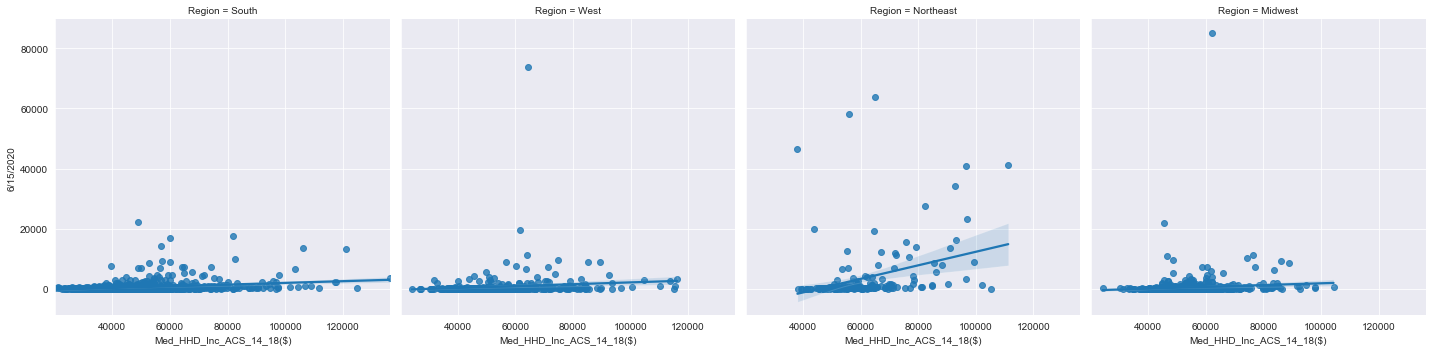

In [174]:
plt.rcParams['figure.figsize'] = [12,6]
sns.lmplot(x='Med_HHD_Inc_ACS_14_18($)', y='6/15/2020', data =covid_county_full_region, col='Region');

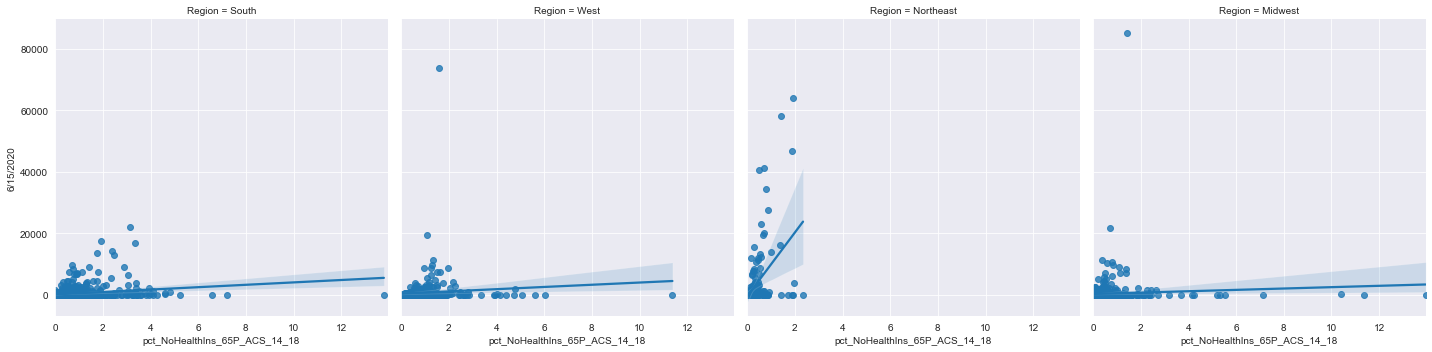

In [176]:
plt.rcParams['figure.figsize'] = [12,6]
sns.lmplot(x='pct_NoHealthIns_65P_ACS_14_18', y='6/15/2020', data =covid_county_full_region, col='Region');

In [177]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# County 'Latitude' and 'Longitude' into  locations 
locations = covid_county_full_region[["Latitude", "Longitude"]]
locations.head()

,Latitude,Longitude
0,32.536382,-86.6445
1,30.659218,-87.7461
2,31.870670,-85.4055
3,33.015893,-87.1271
4,33.977448,-86.5672


In [185]:
# Create a cases Heatmap layer
cases = covid_county_full_region["6/15/2020"]

# Customize the size of the figure
figure_layout = {'width': '800px', 'height': '450px', 'border': '3px solid red', 'padding': '3px', 'margin': '0 auto 0 auto'}

# choice of map_type="HYBRID", "TERRAIN" 
fig = gmaps.figure(layout = figure_layout, map_type = "TERRAIN")

cases_heat_layer = gmaps.heatmap_layer(locations, weights = cases, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 0.30)

fig.add_layer(cases_heat_layer)

fig

Figure(layout=FigureLayout(border='3px solid red', height='450px', margin='0 auto 0 auto', padding='3px', widt…